In [48]:
import pandas as pd    ###dataread###（1〜4行目と出力の上5行くらいを図示）
data  = pd.read_csv("sensor_data_200.txt", delimiter=" ", 
                    header=None, names = ("date","time","ir","lidar"))
data

,date,time,ir,lidar
0,20180122,95819,305,214
1,20180122,95822,299,211
2,20180122,95826,292,199
3,20180122,95829,321,208
4,20180122,95832,298,212
...,...,...,...,...
58983,20180124,120023,313,208
58984,20180124,120026,297,200
58985,20180124,120030,323,204
58986,20180124,120033,326,207


In [49]:
print(data["lidar"][0:5]) ###getvalues###

0    214
1    211
2    199
3    208
4    212
Name: lidar, dtype: int64


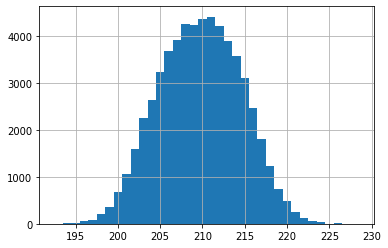

In [50]:
import matplotlib.pyplot as plt
data["lidar"].hist(bins = max(data["lidar"]) - min(data["lidar"]),align='left')
plt.show()

In [51]:
mean1 = sum(data["lidar"].values)/len(data["lidar"].values)   ###calcmean###
mean2 = data["lidar"].mean()
print(mean1,mean2)

209.73713297619855 209.73713297619855


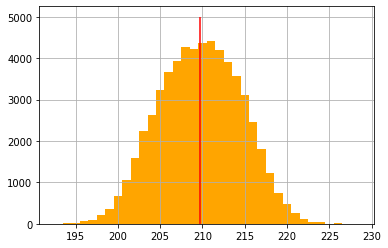

In [52]:
data["lidar"].hist(bins = max(data["lidar"]) - min(data["lidar"]),color="orange",align='left')   ###avgplot###
plt.vlines(mean1,ymin=0,ymax=5000,color="red")
plt.show()

In [53]:
# 定義から計算　                     ### calcvar
zs = data["lidar"].values  
mean = sum(zs)/len(zs)
diff_square = [ (z - mean)**2 for z in zs]

sampling_var = sum(diff_square)/(len(zs))     # 標本分散
unbiased_var = sum(diff_square)/(len(zs)-1) # 不偏分散

print(sampling_var)
print(unbiased_var)

# Pandasを使用
pandas_sampling_var = data["lidar"].var(ddof=False) # 標本分散
pandas_default_var = data["lidar"].var()        # デフォルト（不偏分散）

print(pandas_sampling_var)
print(pandas_default_var)

# NumPyを使用
import numpy as np

numpy_default_var = np.var(data["lidar"])  # デフォルト（標本分散）
numpy_unbiased_var = np.var(data["lidar"], ddof=1)  # 不偏分散

print(numpy_default_var)
print(numpy_unbiased_var)

23.407709770274106
23.40810659855441


TypeError: `ddof` must be an integer

In [54]:
import math ###  calcstddev

# 定義から計算
stddev1 = math.sqrt(sampling_var)
stddev2 = math.sqrt(unbiased_var)

# Pandasを使用 
pandas_stddev = data["lidar"].std()

print(stddev1)
print(stddev2)
print(pandas_stddev)

4.838151482774605
4.83819249292072
4.83819249292072
